### Классификация Текстов с использованием Наивного Байесовского Классификатора

In [1]:
#standard libraries
import pandas as pd, numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#text
from sklearn.feature_extraction.text import CountVectorizer

#machine learning
from sklearn import metrics
from sklearn import model_selection

#probability theory
from sklearn import naive_bayes

##### **Задание 1**

Откройте данные.

In [2]:
#import the data set
data = pd.read_csv('data/spam_or_not_spam.csv')

In [3]:
#display the data
data.head(3)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0


In [4]:
#find the basic information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


Узнайте, сколько в них спам и не спам-писем.

In [5]:
#find the split
data['label'].value_counts()

label
0    2500
1     500
Name: count, dtype: int64

In [6]:
#find the split (%-wise)
(data['label'].value_counts(normalize=True) * 100).round(2)

label
0    83.33
1    16.67
Name: proportion, dtype: float64

Визуализируйте полученные соотношение подходящим образом.

/var/folders/0j/pqz07rqd22q5j3qyrrpztqnr0000gn/T/ipykernel_19055/2383450899.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels_split.set(xlabel='Label',


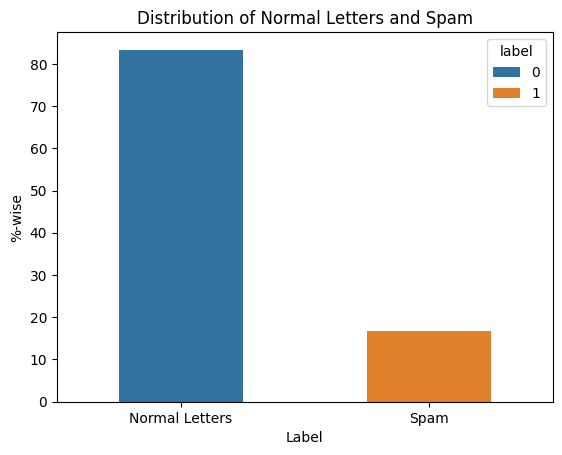

In [7]:
#create a countplot to show the split in labels (%-wise)
labels_split = sns.countplot(data,
                             x='label',
                             hue='label',
                             stat='percent',
                             width=0.5,
                             #legend=False
)

#set the title and axis labels
labels_split.set(xlabel='Label',
                 ylabel='%-wise',
                 xticklabels=['Normal Letters', 'Spam'],
                 title='Distribution of Normal Letters and Spam')

plt.show();

##### **Задание 2**

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [8]:
#check for null values
data.isnull().sum()[data.isnull().sum() > 0]

email    1
dtype: int64

In [9]:
#original dimensions
data.shape

(3000, 2)

In [10]:
#replace any rows with blanks to NaN
data['email'] = data['email'].replace(r'^\s*$', np.nan, regex=True)

#delete rows / columns with any blanks
data = data.dropna(how='any')

In [11]:
#new dimensions
data.shape

(2997, 2)

In [12]:
#check for null values
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

Переводим данные в векторный вид:

In [13]:
#create the initializer
vectorizer = CountVectorizer()

#execute the initializer to convert data into vectors
X = vectorizer.fit_transform(data['email'])

Определите, сколько теперь признаков в нашем наборе данных:

In [14]:
#find the dimensions after vectorization
print(f'records: {X.shape[0]} \n features: {X.shape[1]}')

records: 2997 
 features: 34116


##### **Задание 3**

Определите целевую переменную и признаки:

In [15]:
#select the features
##predictive value
y = data['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [16]:
#split the data into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)

print(f'train: {X_train.shape, y_train.shape}, \n test: {X_test.shape, y_test.shape}')

train: ((2247, 34116), (2247,)), 
 test: ((750, 34116), (750,))


Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [17]:
round(y_test.mean(), 3)

0.165

##### **Задание 4**

Данные - текстовые, поэтому следует использовать *MultinomialNB* и его улучшенную версию - *ComplementNB* для решения задачи классификации.

In [18]:
from collections import OrderedDict

#create an ordered dict to store model results
review = OrderedDict([
    ('model_name', []),
    ('hyperparameters', []), 
    ('F1-Score, train', []), 
    ('F1-Score, test', [])
    ])

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [19]:
#create the object class
complement_model = naive_bayes.ComplementNB(
    alpha=0.01,  
)

#model learning
complement_model.fit(X_train, y_train)

#make a prediction
y_pred_train_cnb = complement_model.predict(X_train)
y_pred_test_cnb = complement_model.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [20]:
#display the classification metrics
print('Train Classification Metrics:')
print(metrics.classification_report(y_train, y_pred_train_cnb, digits=3))
print(sep='/n')
print('Test Classification Metrics:')
print(metrics.classification_report(y_test, y_pred_test_cnb, digits=3))

Train Classification Metrics:
              precision    recall  f1-score   support

           0      0.999     1.000     1.000      1874
           1      1.000     0.997     0.999       373

    accuracy                          1.000      2247
   macro avg      1.000     0.999     0.999      2247
weighted avg      1.000     1.000     1.000      2247


Test Classification Metrics:
              precision    recall  f1-score   support

           0      0.986     1.000     0.993       626
           1      1.000     0.927     0.962       124

    accuracy                          0.988       750
   macro avg      0.993     0.964     0.978       750
weighted avg      0.988     0.988     0.988       750



In [21]:
#add model results to the ordered dict
review['model_name'].append(complement_model.__class__.__name__)
review['hyperparameters'].append('alpha=0.01')
review['F1-Score, train'].append(round(metrics.f1_score(y_train, y_pred_train_cnb), 3))
review['F1-Score, test'].append(round(metrics.f1_score(y_test, y_pred_test_cnb), 3))

Нарисуйте ROC-кривую:

In [22]:
#set the variables
false_positive_scores, true_positive_scores, threshold = metrics.roc_curve(y_test, y_pred_test_cnb)

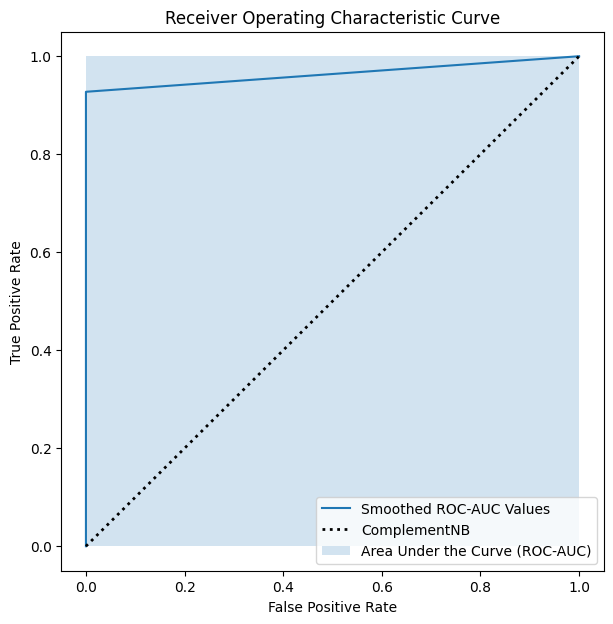

In [23]:
#set the canvas
plt.figure(figsize=(7, 7))

#create the curve
plt.plot(false_positive_scores, true_positive_scores, 
         label='Smoothed ROC-AUC Values')

#set the curve corresponding to random guessing
plt.plot([0, 1], [0, 1],
         color='k',
         lw=2,
         linestyle=':', 
         label=complement_model.__class__.__name__)

#set the title and axis-labels
plt.title('Receiver Operating Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#set the area under the curve
plt.fill_between(false_positive_scores, true_positive_scores,
                 step="pre", 
                 alpha=0.2,
                 label='Area Under the Curve (ROC-AUC)')

plt.legend()
plt.show()

In [24]:
#calculate ROC AUC Score
print('train data:')
print(f'ROC AUC Score: {metrics.roc_auc_score(y_train, y_pred_train_cnb).round(3)}')
print()
print('test data:')
print(f'ROC AUC Score: {metrics.roc_auc_score(y_test, y_pred_test_cnb).round(3)}')

train data:
ROC AUC Score: 0.999

test data:
ROC AUC Score: 0.964


ROC AUC Score — площадь под кривой ROC, и суммирует, насколько хорошо модель может выдавать относительные оценки для различения положительных и отрицательных случаев по всем пороговых значениям классификации. \
Оценка арьируется от 0 до 1, где 0,5 указывает на случайное угадывание, а 1 указывает на идеальную производительность.

AUC от 0,7 до 0,8 считается приемлемым, от 0,8 до 0,9 считается отличным, а более 0,9 считается выдающимся.
Оценка **0.964** показывает очень хорошие результаты, но нельзя забывать о дисбалансе в распределении, поэтому такая высокая оценка может быть и ошибочной, нужны дополнительные исследования.

##### **Задание 5**

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [25]:
#hyperparameters
from sklearn.model_selection import cross_val_score
import optuna
from optuna import Trial, study, samplers

In [26]:
#use the Optuna method to look for best hyper parameters
def optuna_nb(trial):
  #set hyperparameters
  params = {
    'alpha': trial.suggest_float('alpha', 0.05, 10, step=0.05),
    }

  #use the combinations for model build
  model = naive_bayes.ComplementNB(**params)
  
  #model learning through cross-validation
  score = model_selection.cross_val_score(
    model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='f1_micro',
    n_jobs=-1).mean()

  return score

In [27]:
%%time
#begin hyperparameters selection
#create review object
study_optuna_nb = optuna.create_study(study_name='ComplementNaiveBayes',
                                      direction='maximize')

#search for the best combination
study_optuna_nb.optimize(optuna_nb,
                         n_trials=30)

[I 2024-09-08 21:39:33,414] A new study created in memory with name: ComplementNaiveBayes
[I 2024-09-08 21:39:35,414] Trial 0 finished with value: 0.9403692155407077 and parameters: {'alpha': 4.65}. Best is trial 0 with value: 0.9403692155407077.
[I 2024-09-08 21:39:35,995] Trial 1 finished with value: 0.9910992328631527 and parameters: {'alpha': 0.6000000000000001}. Best is trial 1 with value: 0.9910992328631527.
[I 2024-09-08 21:39:36,579] Trial 2 finished with value: 0.9870952734471666 and parameters: {'alpha': 1.6500000000000001}. Best is trial 1 with value: 0.9910992328631527.
[I 2024-09-08 21:39:36,712] Trial 3 finished with value: 0.8923009156149468 and parameters: {'alpha': 8.500000000000002}. Best is trial 1 with value: 0.9910992328631527.
[I 2024-09-08 21:39:36,859] Trial 4 finished with value: 0.9012026726057906 and parameters: {'alpha': 7.2}. Best is trial 1 with value: 0.9910992328631527.
[I 2024-09-08 21:39:36,998] Trial 5 finished with value: 0.9893204652313784 and param

CPU times: user 416 ms, sys: 212 ms, total: 628 ms
Wall time: 7.08 s


In [28]:
#find the best hyperparameters
print(f'hyperparameters for random forest with optuna {study_optuna_nb.best_params}')

hyperparameters for random forest with optuna {'alpha': 0.6000000000000001}


In [29]:
#find the metrics for test data
model_opt_nb = naive_bayes.ComplementNB(**study_optuna_nb.best_params,
                                        )

#model learning
model_opt_nb.fit(X_train, y_train)
model_opt_nb.fit(X_test, y_test)

#make a prediction
y_train_pred_nb = model_opt_nb.predict(X_train)
y_test_pred_nb = model_opt_nb.predict(X_test)

In [30]:
#display the metrics
print('train data:')
print(f'f1_score: {metrics.f1_score(y_train, y_train_pred_nb, average="micro"):.3f}')
print()
print('test data:')
print(f'f1_score: {metrics.f1_score(y_test, y_test_pred_nb, average="micro"):.3f}')

train data:
f1_score: 0.976

test data:
f1_score: 0.996


In [31]:
#add model results to the ordered dict
review['model_name'].append(model_opt_nb.__class__.__name__)
review['hyperparameters'].append(study_optuna_nb.best_params)
review['F1-Score, train'].append(round(metrics.f1_score(y_train, y_train_pred_nb), 3))
review['F1-Score, test'].append(round(metrics.f1_score(y_test, y_test_pred_nb), 3))

In [32]:
#check whether optimization is moving in the right direction by the number of trials on x-axis and the metrics on y_axis
optuna.visualization.plot_optimization_history(study_optuna_nb, target_name="f1_score")

In [33]:
#show model results
review_results = pd.DataFrame(review)
review_results

,model_name,hyperparameters,"F1-Score, train","F1-Score, test"
0,ComplementNB,alpha=0.01,0.999,0.962
1,ComplementNB,{'alpha': 0.6000000000000001},0.922,0.988


**Вывод**:

Значение alpha оказывает довольно существенное влияние на метрики модели.
Alpha меньше значения по умолчанию = 1 показывает, что модель менее переобучена и общая точность намного лучше.

Для будущего анализа гиперпараметр alpha следует отсортировывать от 0 до 1.